# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img ,img_to_array
import keras

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [53]:
def create_padding(input_image, d):

    #TODO
    # Convert the input image to a NumPy array if it isn't one already
    input_image = img_to_array(input_image)
    input_image = input_image[:, :, 0]
  
    # Get the original dimensions of the input image
    n, m = input_image.shape  # Only take height and width
    
    # Create an output array with dimensions (n+2d) x (m+2d) and initialize it to zero
    output_size = (n + 2 * d, m + 2 * d)  # Tuple of (height, width)
    output_image = np.zeros(output_size)
    
    # Place the original image in the center of the padded output image
    output_image[d:n + d, d:m + d] = input_image

    return output_image
    

input image size = (512, 512)


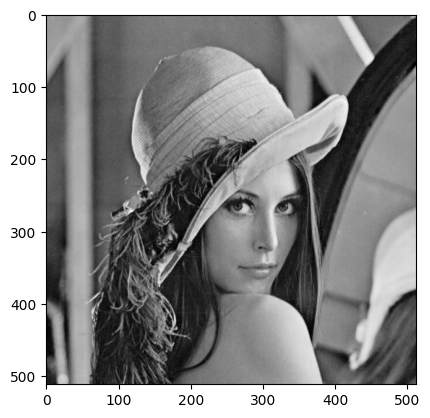

output image size = (516, 516)


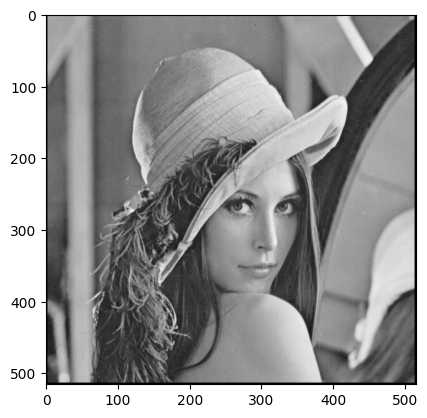

In [77]:
lena = load_img('lena.gif', color_mode='grayscale')

print("input image size =",lena.size)

lena_padding = create_padding(lena, 2)
plt.imshow(lena , cmap ="gray")
plt.show()

print("output image size =",lena_padding.shape)
plt.imshow(lena_padding, cmap ="gray")
plt.show()

**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [57]:
def convolution(input_image, kernel):

    #TODO
    # Convert to numpy array if not already
    input_image = np.array(input_image)
    kernel = np.array(kernel)
    
    # Get dimensions of the input image and kernel
    n, m = input_image.shape
    k, _ = kernel.shape  # Assume kernel is square (k x k)
    
    # Calculate the dimensions of the output image
    output_dim = n - k + 1
    output_image = np.zeros((output_dim, output_dim))
    
    # Perform convolution
    for i in range(output_dim):
        for j in range(output_dim):
            # Extract the sub-matrix of the input image that matches the kernel size
            sub_matrix = input_image[i:i + k, j:j + k]
            # Perform element-wise multiplication and sum the results
            output_image[i, j] = np.sum(sub_matrix * kernel)

    return output_image

(3, 3)
(514, 514)


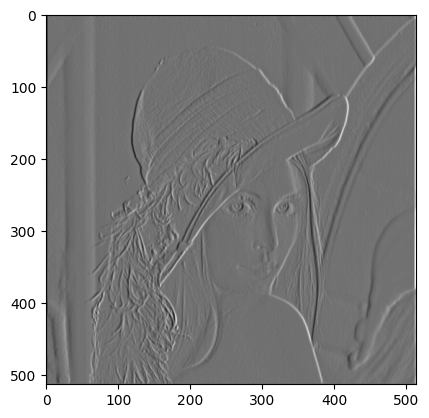

In [79]:
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
print(kernel.shape)

lena_conv = convolution(lena_padding, kernel)
print(out.shape[:2])
plt.imshow(lena_conv , cmap ="gray")
plt.show()

**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [63]:
def pooling(input_image, p, pooling_type = "max_pooling"):

    input_image = np.array(input_image)
    
    # Get dimensions of the input image
    n, m = input_image.shape
    
    # Calculate the dimensions of the output image
    output_dim = n - p + 1
    output_image = np.zeros((output_dim, output_dim))

    if pooling_type == "max_pooling":
        
        #TODO
        for i in range(output_dim):
            for j in range(output_dim):
                sub_matrix = input_image[i:i + p, j:j + p]
                output_image[i, j] = np.max(sub_matrix)
        pass

    elif pooling_type == "avg_pooling":

        #TODO
        for i in range(output_dim):
            for j in range(output_dim):
                sub_matrix = input_image[i:i + p, j:j + p]
                output_image[i, j] = np.mean(sub_matrix)
        pass

    else:
        print("Error: Invalid pooling type")
        return

    return(output_image)
    

Max Pooling:



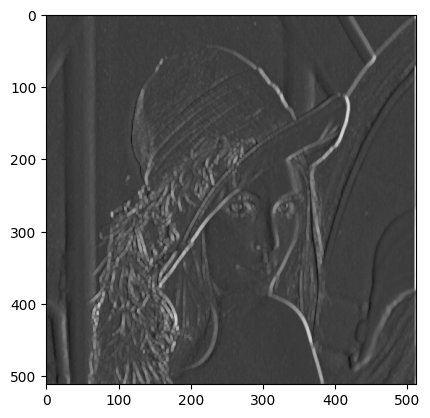

Average Pooling:



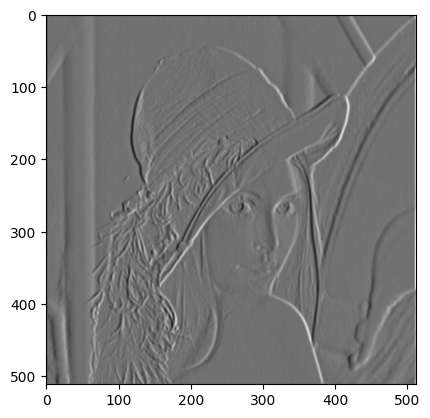

In [81]:
input_image = lena_conv

# Max Pooling with 2x2 window
output_max = pooling(input_image, 3, "max_pooling")
print("Max Pooling:\n")
plt.imshow(output_max , cmap ="gray")
plt.show()

# Average Pooling with 2x2 window
output_avg = pooling(input_image, 3, "avg_pooling")
print("Average Pooling:\n")
plt.imshow(output_avg , cmap ="gray")
plt.show()

The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

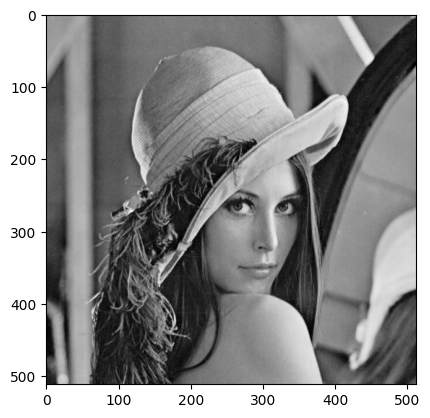

In [82]:
lena = load_img('lena.gif', color_mode='grayscale')
plt.imshow(lena,cmap='gray')
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

<font color='blue'>Explain what the above kernels (including your choice) will do to the image.</font>

**Answer** 

**Kernel 1: Vertical Edge Detection -** 
Detects vertical edges by emphasizing changes in pixel intensity in the horizontal direction. It outputs high values where vertical edges are present.

**Kernel 2: Horizontal Edge Detection -**
Detects horizontal edges by emphasizing changes in pixel intensity in the vertical direction. High values in the output highlight horizontal edges.

**Kernel 3: Sobel X filter -**
Detects vertical edges by highlighting horizontal intensity changes.

**Kernel 4: Sobel Y filter -**
Detects horizontal edges by emphasizing vertical intensity changes.

**Kernel 5: Gaussian Filter -**

$\begin{bmatrix} +1 & +2 & +1 \\ +2 & +4 & +2 \\ +1 & +2 & +1 \end{bmatrix}$
This is a Gaussian blur filter used to smooth the image. It reduces noise and detail, making it useful as a preprocessing step before edge detection.

Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

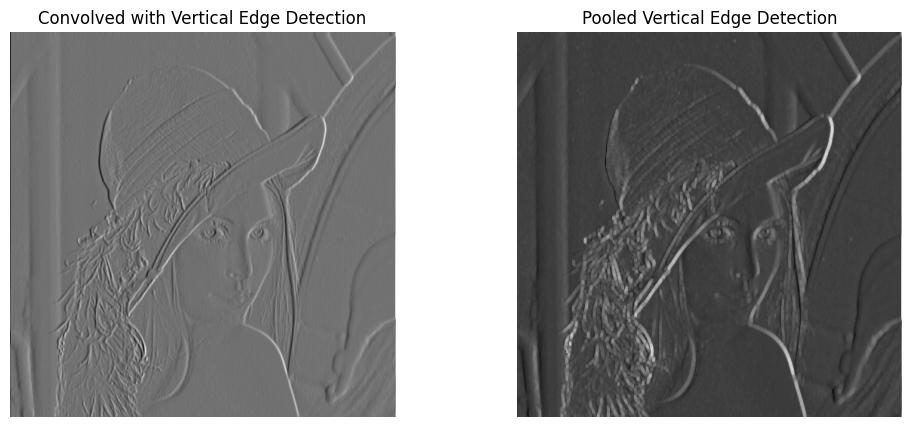

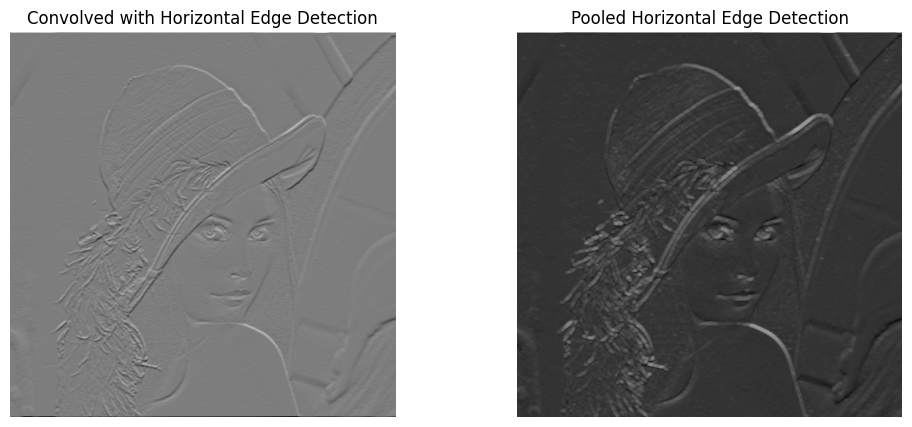

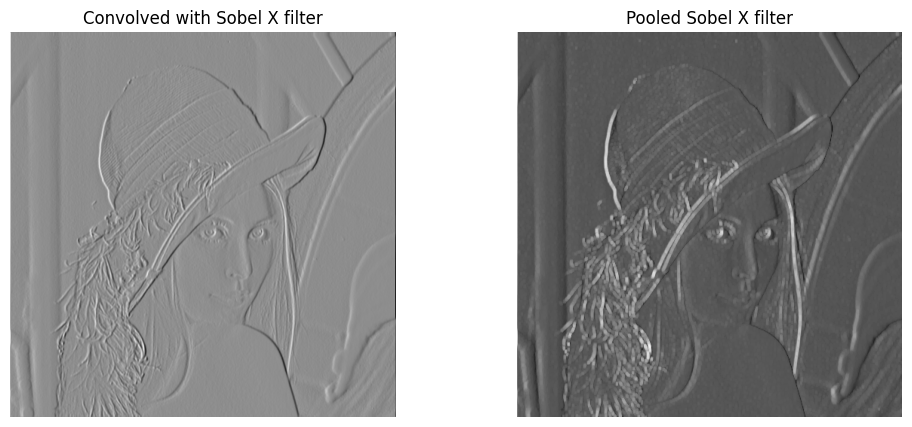

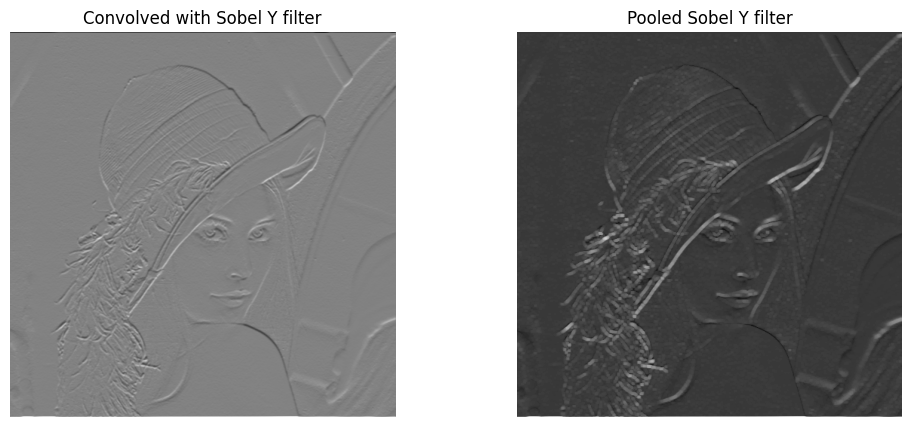

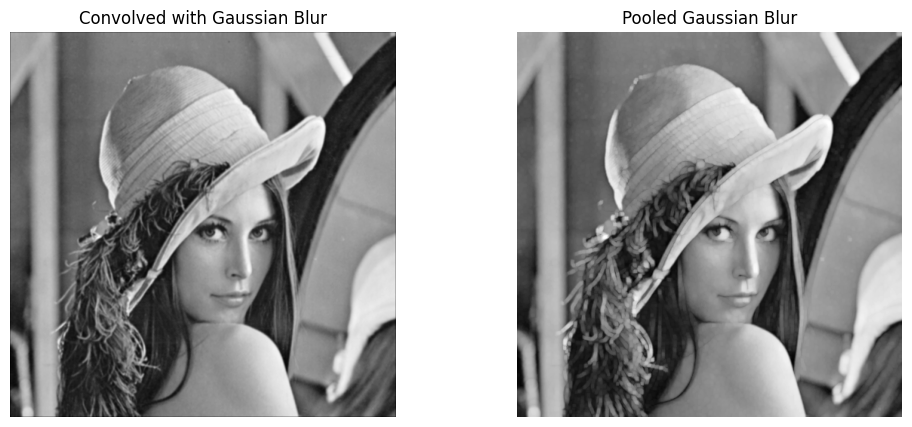

In [71]:
#TODO

# Load the image
lena = load_img('lena.gif', color_mode='grayscale')  # Load as grayscale for simplicity

# Define the kernels
kernels = {
    "Vertical Edge Detection": np.array([[1, 0, -1],
                                         [1, 0, -1],
                                         [1, 0, -1]]),
    "Horizontal Edge Detection": np.array([[-1, -1, -1],
                                            [0, 0, 0],
                                            [1, 1, 1]]),
    "Sobel X filter": np.array([[-1, 0, 1],
                                         [-2, 0, 2],
                                         [-1, 0, 1]]),
    "Sobel Y filter": np.array([[1, 2, 1],
                                          [0, 0, 0],
                                          [-1, -2, -1]]),
    "Gaussian Blur": np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16  # Normalize
}

# Convolution and Pooling
for name, kernel in kernels.items():
    # Apply padding
    padded_lena = create_padding(lena, 1)  # 1-pixel padding for 3x3 kernels
    convolved_image = convolution(padded_lena, kernel)
    
    # Perform pooling on the original unpadded image
    pooled_image = pooling(convolved_image, p=3, pooling_type="max_pooling")  # Use max pooling

    # Display results
    plt.figure(figsize=(12, 5))
    
    # Show Convolution Result
    plt.subplot(1, 2, 1)
    plt.title(f'Convolved with {name}')
    plt.imshow(convolved_image, cmap='gray')
    plt.axis('off')
    
    # Show Pooled Result
    plt.subplot(1, 2, 2)
    plt.title(f'Pooled {name}')
    plt.imshow(pooled_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

#Write code to use your convolution and pooling methods.

<font color='blue'>Comment on the results of the above experiment. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** 

The experiment was successful, clearly demonstrating each filter's effect. I learned how each filter isolates specific features, with Sobel filters providing more detailed edge detection, while Gaussian blurring smooths the image. Pooling helped reduce image complexity while retaining key features, reinforcing its importance in CNNs.

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to build the structure of your project appropriately using keras. I have provided only the code to download the cifar10 dataset. After using CNN on the dataset, provide the following. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Note: You are required test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

[4]


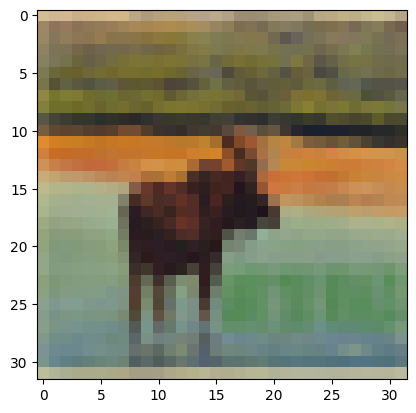

[1]


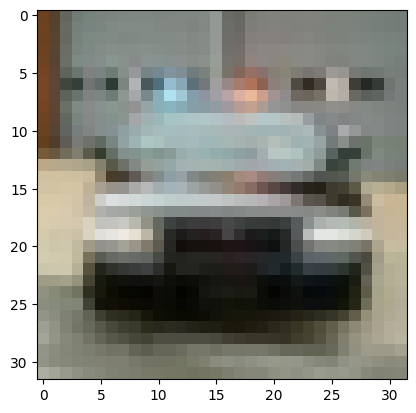

In [43]:
#TODO
num = 66
print(y_train[num])
plt.imshow(x_train[num])
plt.show()

print(y_test[num])
plt.imshow(x_test[num])
plt.show()
#Include necessary code in this cell, or cells added below as required.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [44]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

In [78]:
# Step 3: Define a function to build the CNN model
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
kf = KFold(n_splits=5)
fold = 1

# To store metrics
accuracies = []
model = build_model()
for train_index, val_index in kf.split(x_train):
    print(f"Training fold {fold}...")
    fold += 1
    
    # Split the data into training and validation sets for each fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Create and train model
    model = build_model()
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(x_val_fold, y_val_fold))
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
    accuracies.append(val_accuracy)

# Average cross-validation accuracy
print(f"Average 5-Fold Validation Accuracy: {np.mean(accuracies)}")


Training fold 1...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.2634 - loss: 1.9697 - val_accuracy: 0.5054 - val_loss: 1.3874
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4890 - loss: 1.4253 - val_accuracy: 0.5558 - val_loss: 1.2144
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5698 - loss: 1.2337 - val_accuracy: 0.6149 - val_loss: 1.0973
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6093 - loss: 1.1123 - val_accuracy: 0.6607 - val_loss: 0.9664
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6470 - loss: 1.0098 - val_accuracy: 0.6583 - val_loss: 0.9717
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6736 - loss: 0.9433 - val_accuracy: 0.6686 - val_loss: 0.9277
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6913 - loss: 0.8813 - val_accuracy: 0.6922 - val_loss: 0.8667
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.708

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7136 - loss: 0.8449
Test Accuracy: 0.7078999876976013
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


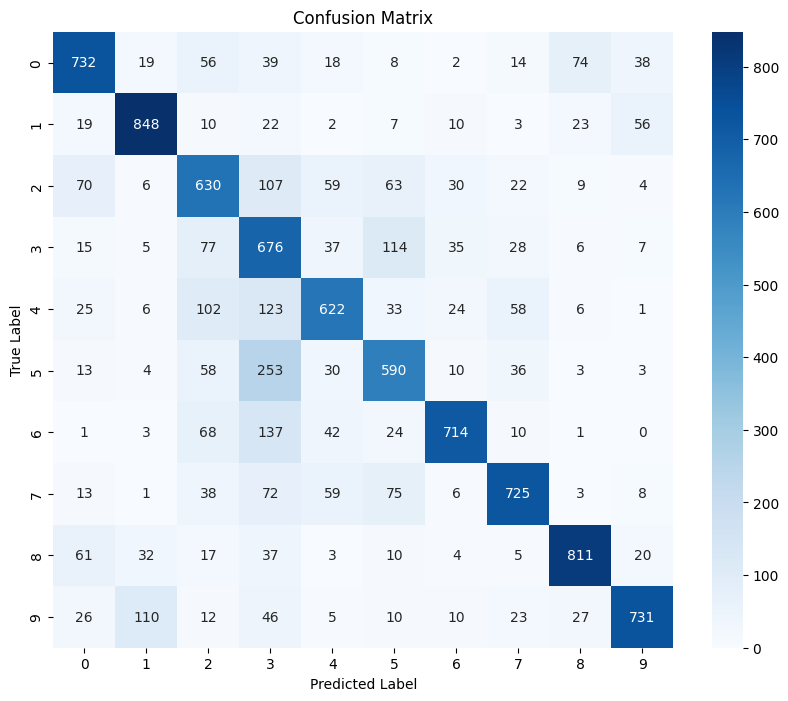

Classification Report:
              precision    recall  f1-score   support

    airplane       0.75      0.73      0.74      1000
  automobile       0.82      0.85      0.83      1000
        bird       0.59      0.63      0.61      1000
         cat       0.45      0.68      0.54      1000
        deer       0.71      0.62      0.66      1000
         dog       0.63      0.59      0.61      1000
        frog       0.84      0.71      0.77      1000
       horse       0.78      0.72      0.75      1000
        ship       0.84      0.81      0.83      1000
       truck       0.84      0.73      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000



In [73]:
# Test the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Test the model
# test_loss, test_accuracy = model.evaluate(x_train[:1000], y_train[:1000])
# print(f"Test Accuracy: {test_accuracy}")

# # Get predictions
# y_pred = model.predict(x_train[:1000])
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_train[:1000], axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report for precision, recall, f1-score
class_report = classification_report(y_true, y_pred_classes, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(f"Classification Report:\n{class_report}")


In [80]:
from sklearn.metrics import confusion_matrix, classification_report
kf = KFold(n_splits=5)
fold = 1

# To store metrics
accuracies = []
model = build_model()
for train_index, val_index in kf.split(x_train):
    print(f"Training fold {fold}...")
    fold += 1
    
    # Split the data into training and validation sets for each fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Create and train model
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(x_val_fold, y_val_fold))
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
    accuracies.append(val_accuracy)

# Average cross-validation accuracy
print(f"Average 5-Fold Validation Accuracy: {np.mean(accuracies)}")


Training fold 1...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.2615 - loss: 1.9604 - val_accuracy: 0.4530 - val_loss: 1.4864
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4869 - loss: 1.4169 - val_accuracy: 0.5821 - val_loss: 1.1861
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5552 - loss: 1.2539 - val_accuracy: 0.6171 - val_loss: 1.0830
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6043 - loss: 1.1251 - val_accuracy: 0.6401 - val_loss: 1.0218
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6344 - loss: 1.0530 - val_accuracy: 0.6210 - val_loss: 1.0601
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6624 - loss: 0.9698 - val_accuracy: 0.6859 - val_loss: 0.8977
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6857 - loss: 0.9022 - val_accuracy: 0.6905 - val_loss: 0.8807
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.706

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7347 - loss: 1.3624
Test Accuracy: 0.7328000068664551
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


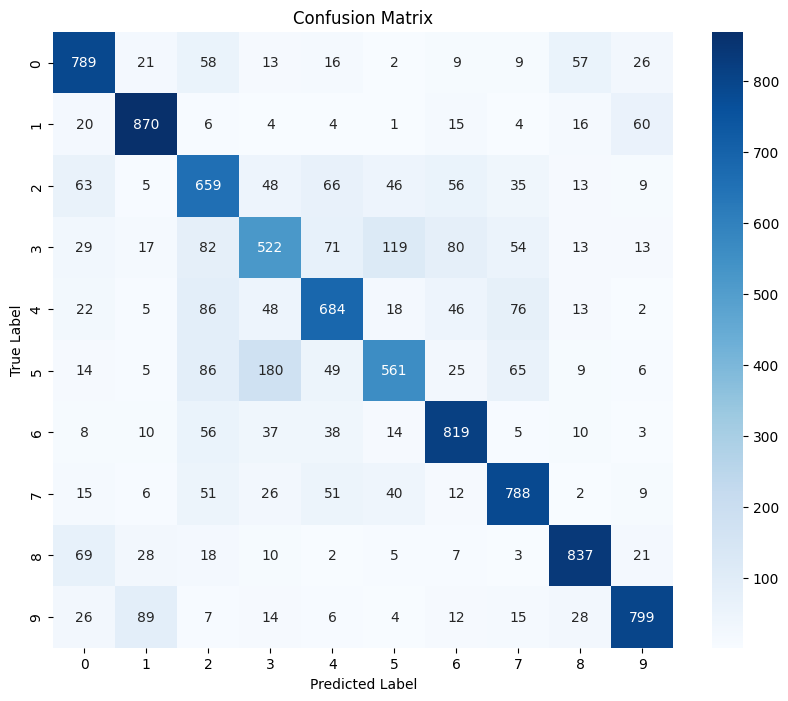

Classification Report:
              precision    recall  f1-score   support

    airplane       0.75      0.79      0.77      1000
  automobile       0.82      0.87      0.85      1000
        bird       0.59      0.66      0.62      1000
         cat       0.58      0.52      0.55      1000
        deer       0.69      0.68      0.69      1000
         dog       0.69      0.56      0.62      1000
        frog       0.76      0.82      0.79      1000
       horse       0.75      0.79      0.77      1000
        ship       0.84      0.84      0.84      1000
       truck       0.84      0.80      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [81]:
# Test the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report for precision, recall, f1-score
class_report = classification_report(y_true, y_pred_classes, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(f"Classification Report:\n{class_report}")


In [74]:
# Step 3: Define a function to build the CNN model
def build_improved_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [76]:
from sklearn.metrics import confusion_matrix, classification_report
kf = KFold(n_splits=5)
fold = 1

# To store metrics
accuracies = []
model = build_improved_model()
for train_index, val_index in kf.split(x_train):
    print(f"Training fold {fold}...")
    fold += 1
    
    # Split the data into training and validation sets for each fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Create and train model
    # model = build_model()
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold))
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
    accuracies.append(val_accuracy)

# Average cross-validation accuracy
print(f"Average 5-Fold Validation Accuracy: {np.mean(accuracies)}")


Training fold 1...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.2237 - loss: 2.0373 - val_accuracy: 0.4142 - val_loss: 1.5827
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4136 - loss: 1.5979 - val_accuracy: 0.4795 - val_loss: 1.4395
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4706 - loss: 1.4514 - val_accuracy: 0.5193 - val_loss: 1.3375
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.5138 - loss: 1.3521 - val_accuracy: 0.5285 - val_loss: 1.3153
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.5461 - loss: 1.2758 - val_accuracy: 0.5657 - val_loss: 1.2142
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.5737 - loss: 1.1950 - val_accuracy: 0.6009 - val_loss: 1.1297
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.5911 - loss: 1.1467 - val_accuracy: 0.6138 - val_loss: 1.1028
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7267 - loss: 1.2582
Test Accuracy: 0.7232999801635742
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


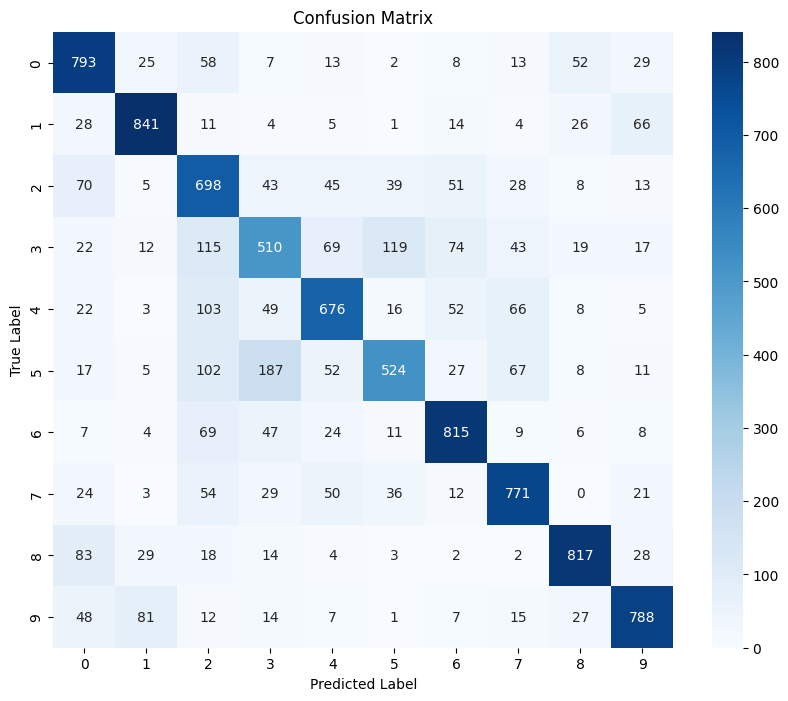

Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.79      0.75      1000
  automobile       0.83      0.84      0.84      1000
        bird       0.56      0.70      0.62      1000
         cat       0.56      0.51      0.54      1000
        deer       0.72      0.68      0.70      1000
         dog       0.70      0.52      0.60      1000
        frog       0.77      0.81      0.79      1000
       horse       0.76      0.77      0.76      1000
        ship       0.84      0.82      0.83      1000
       truck       0.80      0.79      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [77]:
# Test the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report for precision, recall, f1-score
class_report = classification_report(y_true, y_pred_classes, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(f"Classification Report:\n{class_report}")


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
kf = KFold(n_splits=5)
fold = 1

# To store metrics
accuracies = []
model = build_model()
for train_index, val_index in kf.split(x_train):
    print(f"Training fold {fold}...")
    fold += 1
    
    # Split the data into training and validation sets for each fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Create and train model
    # model = build_model()
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold))
    
    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
    accuracies.append(val_accuracy)

# Average cross-validation accuracy
print(f"Average 5-Fold Validation Accuracy: {np.mean(accuracies)}")


Training fold 1...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3028 - loss: 1.8720 - val_accuracy: 0.5212 - val_loss: 1.3064
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5198 - loss: 1.3333 - val_accuracy: 0.5958 - val_loss: 1.1269
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5980 - loss: 1.1332 - val_accuracy: 0.6560 - val_loss: 0.9719
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6534 - loss: 1.0000 - val_accuracy: 0.6518 - val_loss: 0.9869
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6786 - loss: 0.9177 - val_accuracy: 0.6925 - val_loss: 0.8823
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7124 - loss: 0.8208 - val_accuracy: 0.6996 - val_loss: 0.8610
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7305 - loss: 0.7729 - val_accuracy: 0.7186 - val_loss: 0.8209
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7219 - loss: 1.6195
Test Accuracy: 0.7268000245094299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


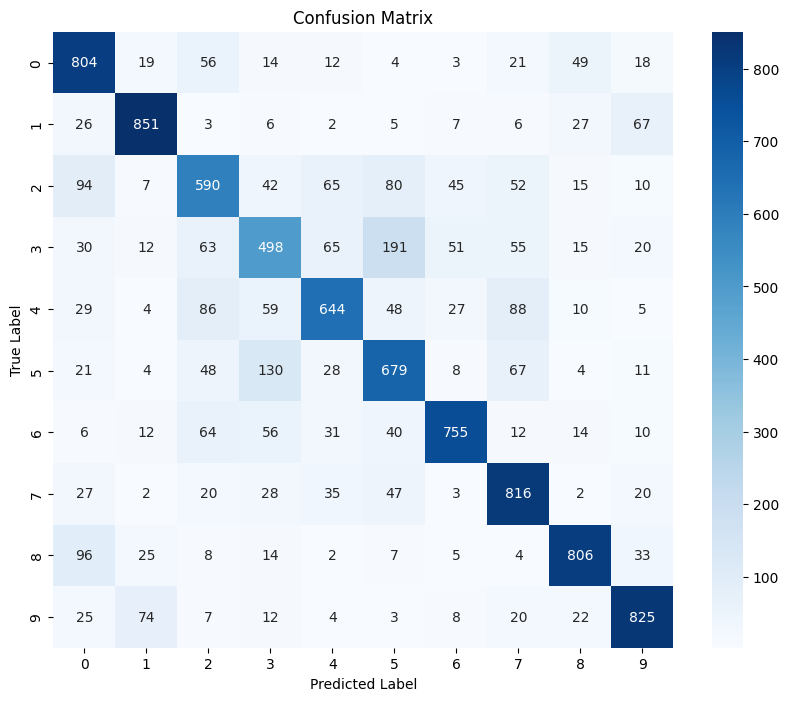

Classification Report:
              precision    recall  f1-score   support

    airplane       0.69      0.80      0.75      1000
  automobile       0.84      0.85      0.85      1000
        bird       0.62      0.59      0.61      1000
         cat       0.58      0.50      0.54      1000
        deer       0.73      0.64      0.68      1000
         dog       0.62      0.68      0.65      1000
        frog       0.83      0.76      0.79      1000
       horse       0.72      0.82      0.76      1000
        ship       0.84      0.81      0.82      1000
       truck       0.81      0.82      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [69]:
# Test the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Test the model
# test_loss, test_accuracy = model.evaluate(x_train[:1000], y_train[:1000])
# print(f"Test Accuracy: {test_accuracy}")

# # Get predictions
# y_pred = model.predict(x_train[:1000])
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = np.argmax(y_train[:1000], axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# print(f"Confusion Matrix:\n{conf_matrix}")
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification report for precision, recall, f1-score
class_report = classification_report(y_true, y_pred_classes, target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(f"Classification Report:\n{class_report}")


<font color='blue'>Comment on the results of the above experiment, including which classes were difficult to classify and your opinion. Mention whether you think the experiment was successful, and what your learnt from it.</font>

**Answer** 

Test Accuracy: 73.2% — decent performance for a simple CNN on CIFAR-10.

Class Performance:

Strong: Automobile (82% precision), Truck (84% precision), and Horse.

Weak: Cat (58% F1-score), Dog, and Deer — these classes were often confused with each other due to shared features.

Key Issues: Cat vs. Dog misclassification was common, indicating difficulty with visually similar classes.

Success?: Moderately successful. The model captured basic features but struggled with finer distinctions.

Learnings:Similar classes (e.g., animals) are harder to classify.
A deeper model or transfer learning could improve accuracy.
Data augmentation and hyperparameter tuning could also enhance results.